In [1]:
from IPython.display import display
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Download dataset

In [14]:
DATASET_PATH = '../data/'
DATASET_FILENAME = DATASET_PATH + 'fish.zip'

raw_dataset = pd.read_csv(DATASET_FILENAME)

# Data Cleaning

In [15]:
raw_dataset.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [16]:
raw_dataset.shape

(159, 7)

In [19]:
raw_dataset.columns = raw_dataset.columns.str.lower().str.replace(' ','_')

In [20]:
raw_dataset.columns

Index(['species', 'weight', 'length1', 'length2', 'length3', 'height',
       'width'],
      dtype='object')

In [22]:
raw_dataset.isnull().sum()

species    0
weight     0
length1    0
length2    0
length3    0
height     0
width      0
dtype: int64

# EDA
- [x] Check features  
- [x] Select feature types and target
  [x] Categorical: display count values ("histogram"), check mutual_info_score
- [x] Numerical: Numerical: check distributions, correlations, skewness and outliers


In [42]:
# Check features
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   species  159 non-null    object 
 1   weight   159 non-null    float64
 2   length1  159 non-null    float64
 3   length2  159 non-null    float64
 4   length3  159 non-null    float64
 5   height   159 non-null    float64
 6   width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


This dataset is very usable. There are no nulls/NaNs and the inferred types by read_csv are correct. Categorical feature 'species' and the rest of the features are numerical. Select 'weight' as target for predictions

In [38]:
categorical = list(raw_dataset.dtypes.index[(raw_dataset.dtypes == 'object') | (raw_dataset.dtypes == 'str')])
numerical = list(raw_dataset.dtypes.index[(raw_dataset.dtypes != 'object') & (raw_dataset.dtypes != 'str')])

In [ ]:
target = 'weight'
numerical.remove(target)

## Categorical

In [105]:
raw_dataset.describe(include=['object'])

,species
count,159
unique,7
top,perch
freq,56


,perch,bream,roach,pike,smelt,parkki,whitefish
species,56,35,20,17,14,11,6


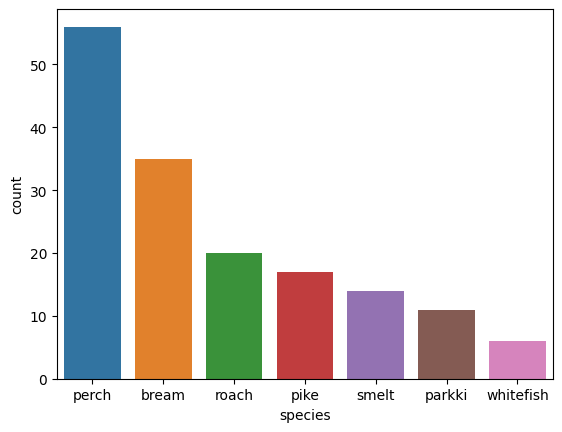

In [106]:
for category in categorical:
  raw_dataset[category] = raw_dataset[category].str.lower()
  value_counts = pd.DataFrame(raw_dataset[category].value_counts())
  display(value_counts.T)
  sns.countplot(x=raw_dataset[category], order=value_counts.index)

Correlation between categorical variables and numerical variables (target or any other feature) may be calculated by alternative methods. Not implemented for now 
https://stats.stackexchange.com/questions/29489/how-do-i-study-the-correlation-between-a-continuous-variable-and-a-categorical


## Numerical

In [70]:
raw_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


Histogram of numerical variables

C:\Users\MARCOS\AppData\Local\Temp\ipykernel_27928\2083701009.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  raw_dataset[numerical].hist(bins=50, ax=ax, layout=(3,3))


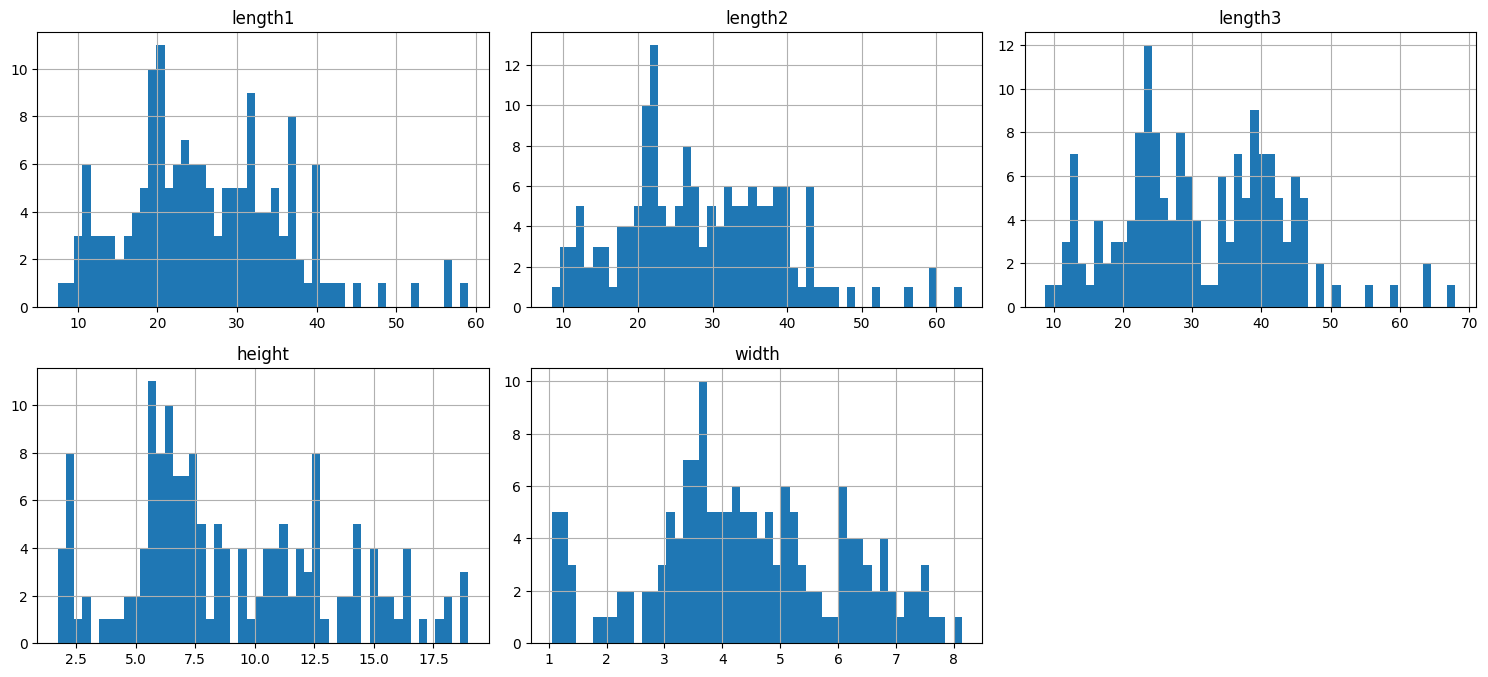

In [100]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
raw_dataset[numerical].hist(bins=50, ax=ax, layout=(3,3))
plt.tight_layout()
plt.show()

Check skew, a numerical formulation of what we see in the histograms.
When a distribution is asymmetrical the tail of the distribution is skewed to one side-to the right or to the left.
When the value of the skewness is negative, the tail of the distribution is longer towards the left hand side of the curve.
When the value of the skewness is positive, the tail of the distribution is longer towards the right hand side of the curve.
If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
If the skewness is less than -1 or greater than 1, the data are highly skewed

In [109]:
raw_dataset[numerical].skew()

length1    0.588482
length2    0.539863
length3    0.391541
height     0.397186
width      0.004972
dtype: float64

Check outliers

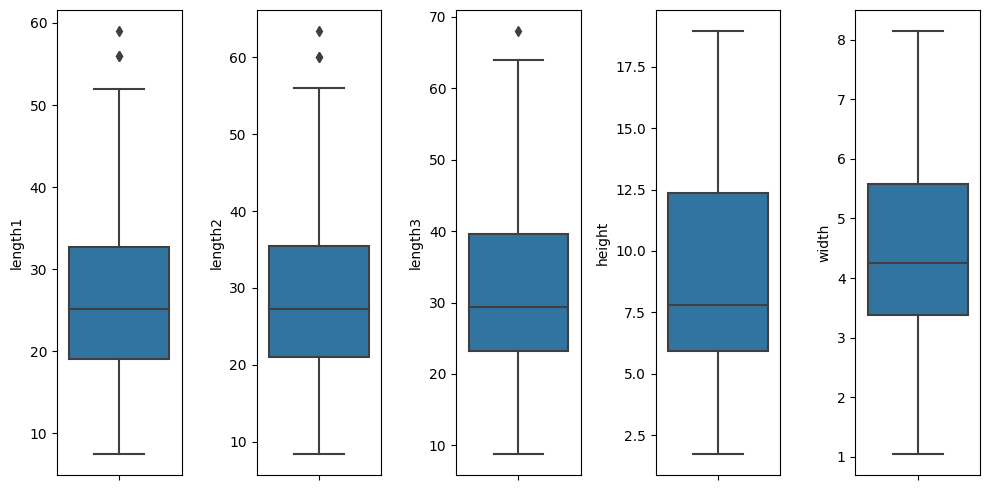

In [135]:
f, axes = plt.subplots(1,5, figsize=(10, 5))

for name, ax in zip(numerical, axes.flatten()):
  sns.boxplot(y=raw_dataset[name], data=raw_dataset, ax = ax)
  
plt.tight_layout()

## Check correlation

<AxesSubplot: >

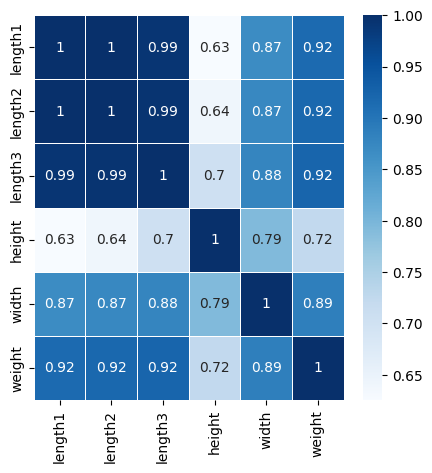

In [143]:
plt.figure(figsize=(5,5))
sns.heatmap(raw_dataset[numerical+[target]].corr(), annot=True, cmap='Blues', linewidths=0.5)

lenghts 1 to 3 are extremely correlated. And any of the numerical features is correlated with weight (target). It is reasonable, since the larger the fish dimensions, the bigger the weight. We could check this on a fish (category) basis, calculate the correlation for each category of fishes

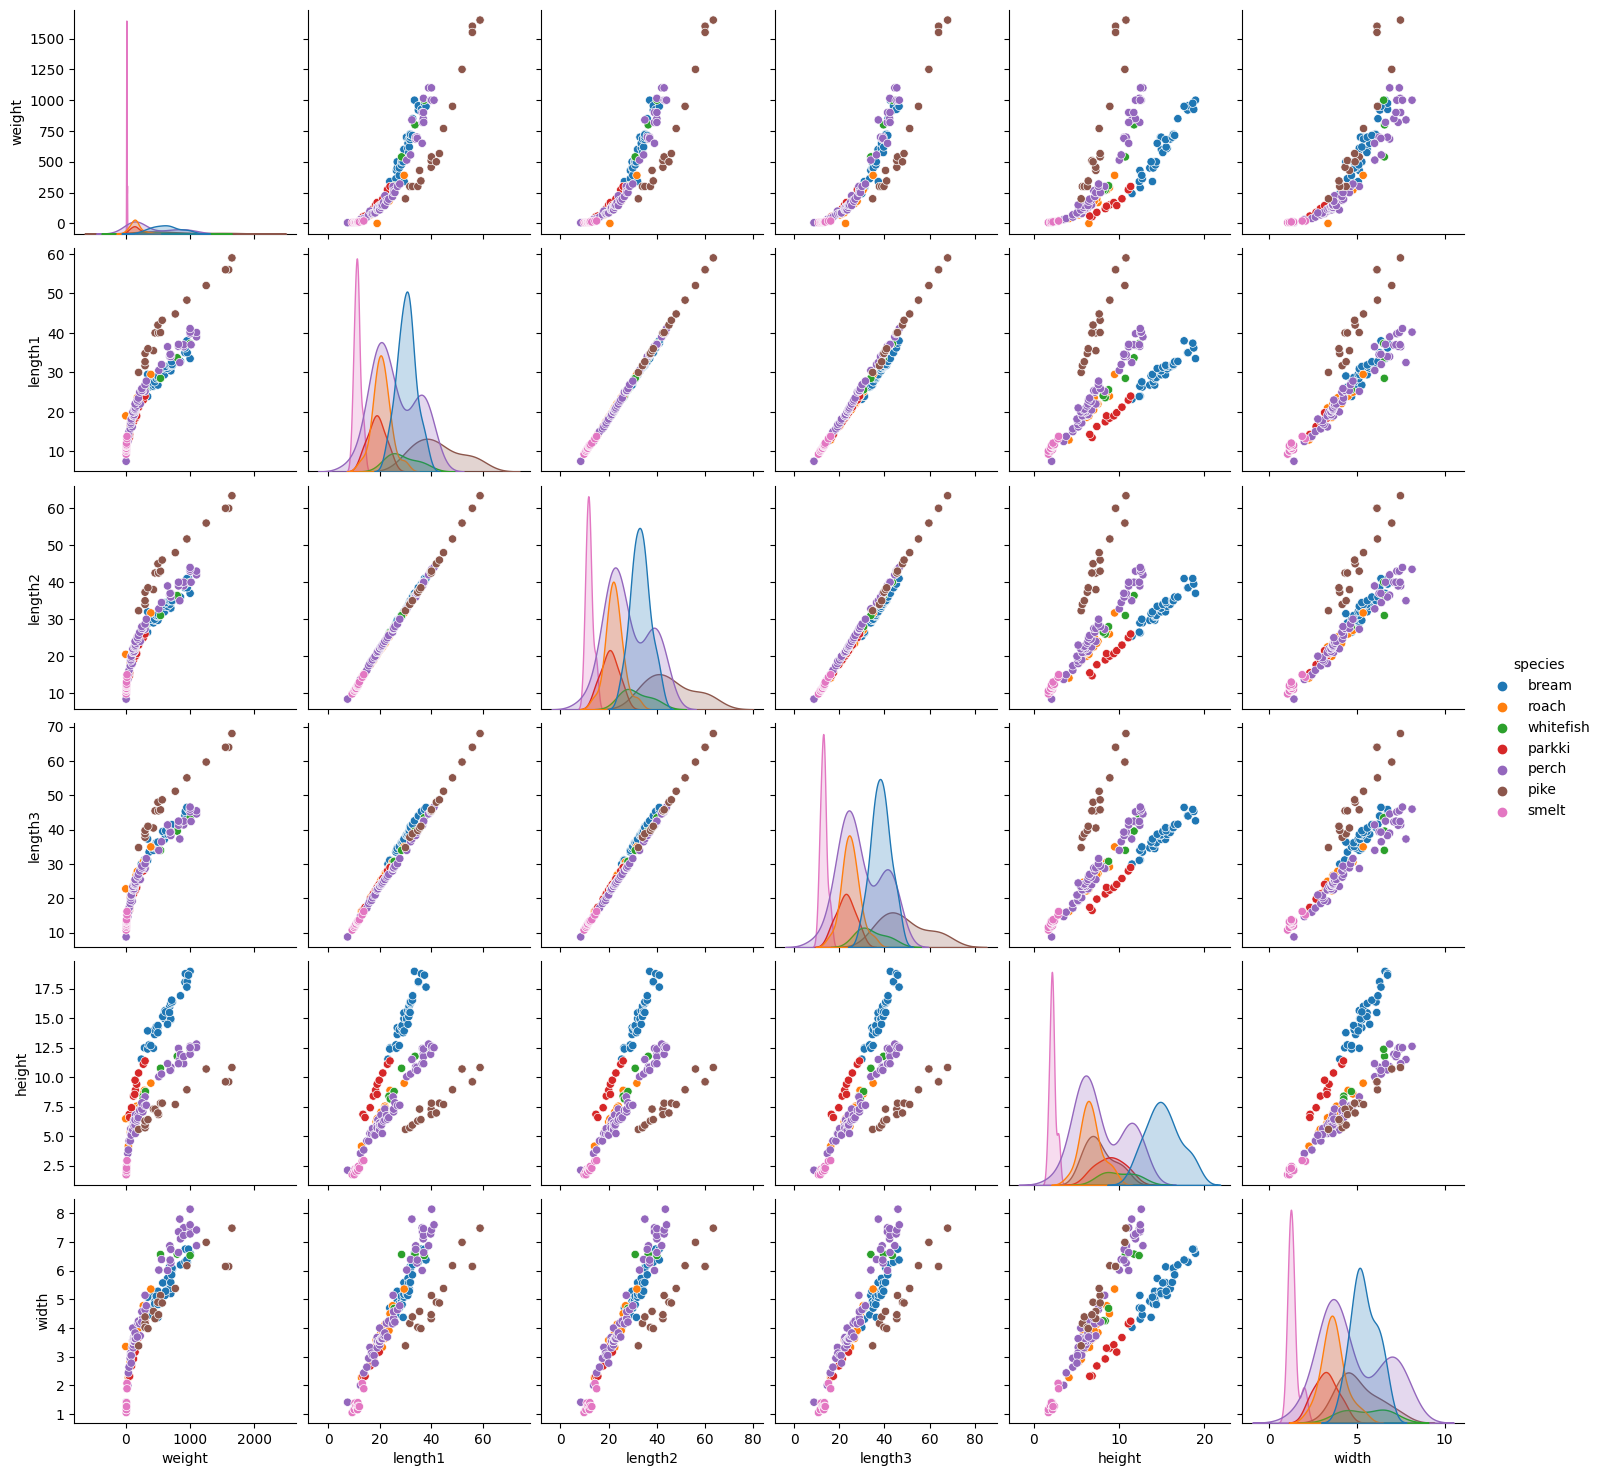

In [145]:
g = sns.pairplot(raw_dataset, kind='scatter', hue='species')

Correlation of lengths persists in all species. The distribution are different for each specie, however these are gaussian-like except for the perch. No no long tails.

# Select strategy

1. Start without managing outliers, and use all three correlated dimensions.   
2. Check with only one of the correlated dimensions.  
3. Manage outliers  

# Select evaluation metrics

# Create train-val-test datasets

# Prepare Features
Define pipeline

# Train Linear Regression

# Train Decission Tree Regressor

# Train Random Forest Regressor

# Train XGBoost Regressor